**OBJECT DETECTION - THE SPARKS FOUNDATION - INTERNSHIP PROJECT**

**made by Szimonetta Farkas | Data Scientist**

**Objective: Implement an Object Detector which identifies the classes of the objects in an image.**

**OpenCV - Open Source Computer Vision Library**

It is an open-source computer vision and machine learning software library.
Open CV is supported by a large community of researchers, developers and users.

**Object Detection**

It is a computer vision technology that involves identifying, localizing objects, detecting their precise location and size in an imagine or a video. It is based on salient features.

Deep Learning Algorithm: MobileNet, Dataset: COCO

**Importing Libraries**

In [2]:
import cv2
import matplotlib.pyplot as plt

**Dataset**

In [3]:
con_file = (r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\object_detection\file.pbtxt')
frozen_model = (r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\object_detection\frozen.pb')

**Creating a Model**

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, con_file)

**Setting Class Labels**

In [5]:
ClassLabels = []
file_name = (r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\object_detection\labels.txt')

with open (file_name, 'rt') as file:
    ClassLabels = file.read().rstrip('\n').split('\n')
    
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
print(len(ClassLabels))

80


**Setting the Model**

In [6]:
model.setInputSize(320,320) # size of the new frame
model.setInputScale(1.0/127.5) # scale factor of the value of the frame
model.setInputMean((127.5, 127.5, 127.5)) # mean value for the frame
model.setInputSwapRB(True) # sets true for all the images

< cv2.dnn.Model 0000016D542FA7B0>

**Reading an Image**

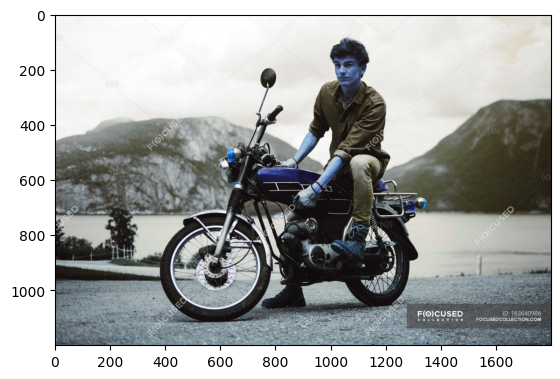

In [6]:
image = cv2.imread(r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\object_detection\motorbike.jpg')
plt.imshow(image)

**Setting Class Index**

In [7]:
ClassIndex, confidence, bbox = model.detect(image, confThreshold = 0.5)
print(ClassIndex)

[4 1]


In [8]:
# 1 - Person, 4 - Motorbike

In [9]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(image, boxes,(255,0,0), 2)
    cv2.putText(image, ClassLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0,255,0),
                thickness = 3)

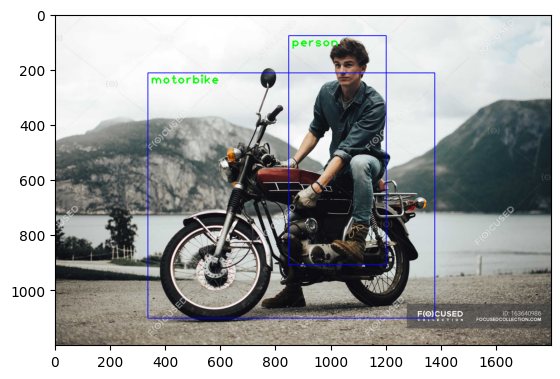

In [10]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

**Video**

In [7]:
cap = cv2.VideoCapture(r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\object_detection\traffic_india.MOV')

In [8]:
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('There is a problem.')

In [9]:
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes,(255,0,0), 2)
                cv2.putText(frame, ClassLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,
                            color = (0,255,0), thickness = 3)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2)  & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyaLLWindows()

[ 4  8  4  8  3  3  3  3 10  1  4  1]
[ 4  3  1  3  3  3 10  8  1  3  3  8  3  1]
[ 4  3  8  3  3  3 10  8  3  8  1  1  2  3]
[ 3 10  3  3  3  4  8 10  1  1  3  1  3  4]
[ 3  3  3  3 10  1  3  3 10  2]
[3 3 3 3 1 3 3 1 3]
[ 3  1  3  3  3 10  3  3  1  3]
[3 3 3 1 8 3 3 8 3 8]
[3 3 3 4 3 1 3 1 3 8 3 1 3]
[3 3 1 3 8 3 3 8 4 1 1 1 3]
[3 1 3 3 3 1 3 1]
[3 3 3 3 8]
[3 3 3 1 1 3 1]
[3 1 1 8 3 8 1 3 3]
[1 3 3 3 1 3 3 3 8 1]
[3 3 3 1 1 3]
[3 3 1 6 3 3 3 3 3 1 6 8]
[3 3 6 1 3 3 1 1 8 1 1 8]
[ 3  6 10  3  1  3  1  1 10  3  1  8  8  1]
[ 3  6  8  3  3  8 10  3  3  1  1  1 10  1  3  1]
[ 6  1  3  4  1  3  8  8  3  3 10  4  8  1]
[ 3  6  3  3  3  8  3  8  1  8 10]
[ 4  1  6  8  3 10  1]
[ 3 10  1  3  4 10  3  1  1  1  1]
[ 3  3 10  1  3 10  3  1]
[3 3 3 1 1 3 1 1 3]
[3 3 3 1 3 3 3 3 1]
[4 3 4 3 3 3 3]
[3 3 1 3 3 3 3 4 3 1]
[3 3 1 4 3 3 1 1]
[3 1 4 3 4 8 3 1]
[3 3 3 1 1 1]
[4 1 3 1]
[4 1 1 3]
[6 1 3 1]
[4 8 3 3 4 6 1]
[1 3 3 8 1 8 2]
[8 1 1 6 1 1 1 3 3 8]
[3 8 1 6 3 8 3 1]
[6 8 3 1 3 1 8 3 1]
[6 3 3 

KeyboardInterrupt: 

**Webcam**

In [10]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('There is a problem.')
    
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes,(255,0,0), 2)
                cv2.putText(frame, ClassLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,
                            color = (0,255,0), thickness = 3)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2)  & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyaLLWindows()

()
()
[1]
[1]
[1 9]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


KeyboardInterrupt: 